# Exercise 01.1
## DONE BY:
## Juan Carlos Eraso, cod: 201127829
## Carlos Quispe Castilla, cod: 201627368


Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

In [69]:
from math import pi
def mult_dec_pi(a, b):
    "Return the product of the a decimal of pi and the b decimal of pi"
    if a > 15:
        print("a and b must be between 1 and 15")
        return
    if a < 1:
        print("a and b must be between 1 and 15")
        return
    if b > 15:
        print("a and b must be between 1 and 15")
        return
    if b < 1:
        print("a and b must be between 1 and 15")
        return
    if 15>= a >=1 and 15>= b >=1:
        number=pi
        number=str(number)
        c=number[a+1]
        d=number[b+1]
        c=int(c)
        d=int(d)
        result = c*d
        return result

In [70]:
mult_dec_pi(1,5)

9

In [71]:
mult_dec_pi(a=2, b=4)
# 20.0

20

In [72]:
mult_dec_pi(a=5, b=10)
# 45.0

45

In [73]:
mult_dec_pi(a=14, b=1)
# 9.0

9

In [74]:
mult_dec_pi(a=6, b=8)
# 10.0

10

In [78]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

a and b must be between 1 and 15


# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

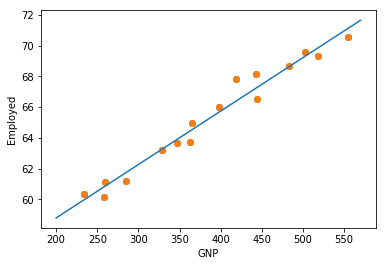

In [100]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]

x= data[:, 2]
y= data[:, 1]

plt.scatter(x,y)
plt.xlabel("GNP")
plt.ylabel("Employed")

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x[:, None], y)

x_new = np.linspace(200, 570)
y_new = clf.predict(x_new[:, None])
plt.scatter(x, y)
plt.plot(x_new, y_new)

# Exercise 01.3

Analyze the baby names dataset using pandas

In [113]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('../datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [141]:
names.head()

,year,name,prop,sex,soundex,decade
0,1880,John,0.081541,boy,J500,188
1,1880,William,0.080511,boy,W450,188
2,1880,James,0.050057,boy,J520,188
3,1880,Charles,0.045167,boy,C642,188
4,1880,George,0.043292,boy,G620,188


In [115]:
names[names.year == 1993].head()   

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [116]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

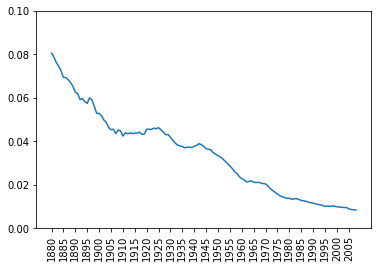

In [117]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

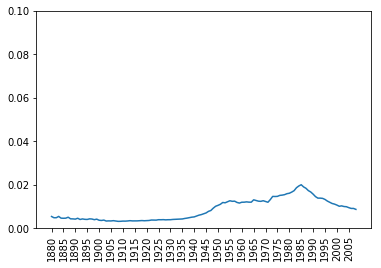

In [118]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

In [188]:
#First we create a new variable with decades numbers
boys['decade'] =names.year/10
boys['decade'] =names.decade.astype(int)
boys['decade'] =names.decade.astype(str)

boys.groupby('decade').name.apply(lambda x: x.mode())

# Exercise 01.4

Which has been the most popular girl name?


In [183]:
#We find the mode for the hole variable names at the dataframe girls
girls.loc[:,"name"].mode()

# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

In [286]:
import pandas as pd
#First we create a new variable with century numbers
girls['century'] =girls.year/1000
girls['century'] =girls.century.astype(int)
girls['century'] =girls.century.astype(str)

df=girls.pivot_table(girls, index='century',columns="name",aggfunc='count')
df=df[['year']].T
df = df[df['1'].isnull()]
df = df[df['2']==9]
df

century          1    2
     name              
year Aliza     NaN  9.0
     Amara     NaN  9.0
     Amya      NaN  9.0
     Anaya     NaN  9.0
     Arely     NaN  9.0
     Aryanna   NaN  9.0
     Belen     NaN  9.0
     Brisa     NaN  9.0
     Hailie    NaN  9.0
     Iyana     NaN  9.0
     Janiya    NaN  9.0
     Jaylin    NaN  9.0
     Kaia      NaN  9.0
     Kaya      NaN  9.0
     Kenna     NaN  9.0
     Lilliana  NaN  9.0
     Litzy     NaN  9.0
     Monserrat NaN  9.0
     Reese     NaN  9.0